# Hypothesis Testing

### Codeup DS students drink more coffee than Codeup WD students
    - null hypothesis = same consumption rates
    - alternative hypothesis = consumption rates are different
    - alpha = 1 - confidence level
    - a = 1 - (what is our threshold for accepting findings even if they are random)
    

### Let'se set our confidence level to be 95%
    - a = 1 - .95 = .05
    - a = 1 - .99 = .01
    - set your confidence level and your alpha before you run any experiemnt

### Boy who cried wolf and hypothesis testing
#### type 1 error
    - boy cries wolf (making a hypothesis)
    - villagers believe it
    - but it's not the case
    - false alarm
    - type 1 error
    - your check engine light comes on, but everything is oka
    - boy cries wolf a second time (no actual wold)
    - villagers make another false alarm (type 1 error)
#### type 2 error
    - boy cries wolf, but there is a wolf
    - villagers disbelieve the hypothesis
    - but the wolf was real 
    - false negative
    - another way to say "false negative" is a miss
    -check engine light stays off, but your engine actually has a problem
    - true positive = check engine light turns on and there is a prob
    - true negative = check engin light remains off, and everytihng is fine
    - false positive = false alarm (engine light on, but no prob)
    - false negative = miss = engine light stays off, but theres actually a prob
    - true/false is the reality
    - positive/negative is the prediction

#### lower alpha means lower tolerance for getting the results we get from chance/randomness


### Null hypothesis is that there is a null difference, null efect, null relationship between things

#### if p < alpha:
    #### print("reject the null hypothesis")
#### else:
    #### print("fail to reject the null hypothesis")

## Python Example

In [12]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
df = data("tips")
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## One tailed t-test example (compare a subgroup to the populatipon)
- business question:  are tips on sunday significantly differnt that the rest of the week?
- the null hypothesis is that there is no difference.  tips are the same on sunday vs the netire week
- the alternatibe hypothesis is that there is a diff between sunday tips and the entire week

In [14]:
null_hypothesis = "sunday tips are the same as the rest of the week"
alternative_hypothesis = "sunday tips are different than the rest of the week"
confidence_level = .95
alpha = 1 - confidence_level


In [17]:
# Make a subgroup
sunday = df[df.day == "Sun"]
sunday

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2
8,26.88,3.12,Male,No,Sun,Dinner,4
9,15.04,1.96,Male,No,Sun,Dinner,2
10,14.78,3.23,Male,No,Sun,Dinner,2


In [18]:
t,p = stats.ttest_1samp(sunday.tip, df.tip.mean())

In [19]:
if p < alpha:
    print("We reject the null hypothesis")
else: 
    print("We fail to reject the null hypothesis")
    print("failing to reject the null != 'accepting the null'")

We fail to reject the null hypothesis
failing to reject the null != 'accepting the null'


# Hypothesis Testing Exercises

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

    - Has the network latency gone up since we switched internet service providers?
    - Is the website redesign any good?
    - Is our television ad driving more sales?

#### Has the network latency gone up since we switched internet service providers?
- null = latency of internet connection is the same since switch
- alternative = latency of internet connection is greater since switch
- true positive = reject the null when the alternative is true
- false positive = reject the null when the alternative is not true
- type 1 = reject null, but latency was same
- type 2 = latency was longer, but fail to reject null

#### Is the website redesign any good?
- null = traffic from website is the same after redesign
- alternative = traffic from 
- true positive = reject the null when the alternative is true
- false positive = reject the null when the alternative is not true
- type 1 = reject null, even though no difference in traffice
- type 2 = fail to reject null, but there was an increase in traffic after redesign

#### Is our television ad driving more sales?
- null = sales are the same after tv ad
- alternative = sales have increased after tv add
- true positive = reject the null when the alternative is true
- false positive = reject the null when the alternative is not true
- type 1 = reject null , but sales were the saem
- type 2 = fail to reject null, but sales increased after add

# T-Test

In [28]:
df = data("tips")

In [ ]:
# Do smokers have a larger total_bill than non smokers?
# null = is that the total_bills are the same for both groups
# We are comparing two subgroups, so we will be doing a two sample t-test
# Since we are lookingif one group is higher total_bill.mean than the other, one tailed


In [29]:
null = "the means of total_bill are the same for smoker vs non smoker"
alt = "smokers have a higher total_bill than non smokers"
confidence_level = .95
alpha = 1 - confidence_level

In [31]:
# lets compare the two populations visually
smokers = df[df.smoker == "Yes"]
non = df[df.smoker == "No"]

In [32]:
#two samp bc were comparing two subgroups to wach other
#single tail, bc were chekcing if smokers total bill is higher
#.ttest_ind test of independence == 2 sample ttest function

t, p = stats.ttest_ind(smokers.total_bill, non.total_bill)
t,p


(1.3384363834700073, 0.1820103288430244)

In [33]:
#p/2 along with t > 0 is how we compare means if higher
if (p>2) < a and t > 0:
    print("reject the null hypothesis")
else:
    print("we fail to reject the null")

NameError: name 'a' is not defined

In [ ]:
#lets take this same setup from above, and check if the means are differenct, regardless
null = "the mean total bill of nonsmokers and smokers is the same"
alt = "the means total bill of nonsmokers and smokers is diff"

#still two sample bc there are 2 subgroups and twotailed bc were looking for any diff


In [34]:
t,p = stats.ttest_ind(smokers.total_bill, non.total_bill)
t,p

(1.3384363834700073, 0.1820103288430244)

In [35]:
if p < a:
    print(" we reject the null hypothesis that they are the same")
    print("we move forward with alt")
else:  
    print("we fail to reject the null")

NameError: name 'a' is not defined

## The host notices us working on statistics in the booth all the time
and they ask us:
- given this data, are tips diff on weekends vs weekdays/
- well have to make a weekend group and weekday group
- were comparing two subgroups we have a 2 sample ttest
- if were not concerned about direction but onlu if the means are diff then well go w two tailed

In [36]:
def weekend(x):
    if x == "Sun" or x == "Sat":
        return 1
    else:
        return 0


In [38]:
df["is_weekend"] = df.day.apply(weekend)
df.tail()

,total_bill,tip,sex,smoker,day,time,size,is_weekend
240,29.03,5.92,Male,No,Sat,Dinner,3,1
241,27.18,2.00,Female,Yes,Sat,Dinner,2,1
242,22.67,2.00,Male,Yes,Sat,Dinner,2,1
243,17.82,1.75,Male,No,Sat,Dinner,2,1
244,18.78,3.00,Female,No,Thur,Dinner,2,0


<AxesSubplot:>

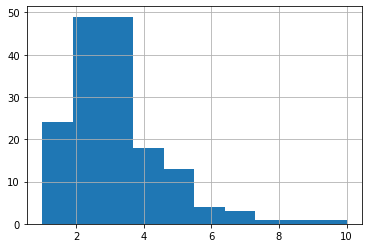

In [39]:
weekends = df[df.is_weekend == 1]
weekdays = df[df.is_weekend == 0]
weekends.tip.hist()

In [44]:
confidence_level = .95
a = 1 - confidence_level

In [47]:
# ttest_ind for two sample ttest
t, p = stats.ttest_ind(weekdays.tip, weekends.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [48]:
if p < a:
    print("we reject the null hypothesis that weekend and weekday tips are the same")
else:
    print("we fail to reject the null hypothesis, not enough evidence to support the claim that the tip levels are diff")
    

we fail to reject the null hypothesis, not enough evidence to support the claim that the tip levels are diff


In [ ]:
#lets check if the weekday tips are higher than weekend tips!
# this means were goig from a two tailed (diorection ambivalent) to a one tailed test


In [50]:
t, p = stats.ttest_ind(weekdays.tip, weekends.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [51]:
# lets check the one tailed test
# t > 0 if were testing if one mean is higher than the other
if (p/2) < a and t > 0:
    print("we reject the null")
else:
    print("we fail to rejct the null")

we fail to rejct the null


In [52]:
#lets make a new hypothesis
# weekeds tips are greater than weekday tips
# lets check the one tailed test
# t < 0 if we're testing if one mean is higer than the other



if (p/2) < a and t < 0:
    print(" we reject the null that tip means are the same")
    print(" we move forward witht he understanding")
else:
    print("we fail to reject the null hypothesis")

 we reject the null


In [53]:
weekdays.tip.mean(), weekends.tip.mean()

(2.7628395061728392, 3.1152760736196328)

# T-Test Exercises

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [60]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [154]:
#Two sample t-test
#office 1
n1 = 40
mean1 = 90
std1 = 15
#office 2
n2 = 50
mean2 = 100
std2 = 20
#degrees of freedom
degf = n1 + n2 - 2
#confidence level and alpha
confidence_level = .95
a = 1 - confidence_level

In [ ]:
# null = average time it takes to sell homes is the same for both offices
# alt = average time it takes to sell homes is different for both offices

In [156]:
#t-test
#pvalue:is the probability that the results from your sample data occured 
#by chance
#tscore: is a ratio between the difference between two groups and the 
#difference within the groups. The larger the t score, the more difference there is between groups. 
#The smaller the t score, the more similarity there is between groups.

stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [64]:
# We reject the null hypothesis because there is a significant difference between both offices

t = -2.62523
p = 1.98979


### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [87]:
df = data("mpg")
df
df.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [106]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# H0 = no differnce in fuel efficiency
# H1 = difference in fuel efficiency
confidence_level = .95
a = 1 - confidence_level
#make avg mileage column
#df.assign(passing_english=df.english >= 70)
df=df.assign(efficiency = (df.cty + df.hwy / 2))


In [141]:
group1 = df[df.year == 1999]
group2 = df[df.year == 2008]
mean1 = group1.efficiency.mean()
mean2 = group2.efficiency.mean()
print(mean1,",", mean2)

28.73076923076923 , 28.427350427350426


<AxesSubplot:>

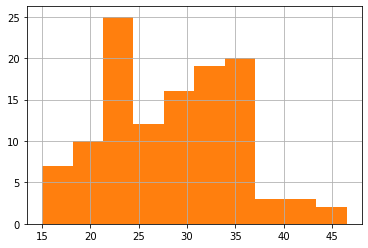

In [142]:
cars1999 = group2.efficiency
cars2008 = group2.efficiency
cars2008.hist()
cars1999.hist()

In [143]:
#ttest
t, p = stats.ttest_ind(cars1999, cars2008)
t, p

(0.0, 1.0)

<AxesSubplot:>

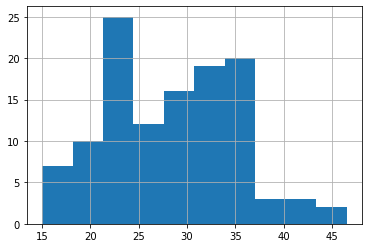

In [140]:
cars2008.hist()

1      compact
2      compact
3      compact
4      compact
5      compact
        ...   
230    midsize
231    midsize
232    midsize
233    midsize
234    midsize
Name: class, Length: 234, dtype: object

In [157]:
#review
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [159]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,19.809524


In [163]:
fe2008 = mpg[mpg.year == 2008].avg_fe
fe1999 = mpg[mpg.year == 1999].avg_fe

In [164]:
t, p = stats.ttest_ind(fe2008, fe1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [ ]:
# Are compact cars more fuel-efficient than the average car?
#H0:  there is no difference in fuel efficientcy between compact and average cars
#H1:  compact cars have great fuel efficiency than average cars


In [170]:
compact = mpg[mpg['class'] == 'compact'].avg_fe
mean = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(compact, mean)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [ ]:
# Do manual cars get better gas mileage than automatic cars?
#two subgroups, one tailed
#H0:  there is no difference in gas mileage between manual and automatic cars
#H1:  manual cars get better gas mileage than automatic cars


In [171]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [172]:
t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

# Correlation

## 1.  Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [245]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from scipy import stats
from pydataset import data

df = pd.read_csv('telco.csv')

In [176]:
#look at the data
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [183]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# 1A. Does tenure correlate with monthly charges?
# With a correlation of .25, tenure shows a positive correlation with monthly charges.


In [177]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [178]:
# pearsons correlation
corr, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
corr, p 

(0.24789985628615002, 4.0940449915016345e-99)

In [ ]:
#Total charges
#With a correlation of .82, tenure shows a positive correlation with total charges

In [212]:
#get rid of nan values
telco = df[df.TotalCharges.isna() == False]
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#madeleine way
# in the even of nans:  df = df.dropna()

In [214]:
x = telco.TotalCharges
y = telco.tenure
corr, p = stats.pearsonr(x, y)
corr , p

(0.825880460933202, 0.0)

In [225]:
# What happens if you control for phone and internet service?
# David way:  
#services_telco = non_na_telco[(non_na_telco.PhoneService == 'Yes')&(non_na_telco.InternetService != 'No')]
phone_internet = telco[(telco.PhoneService == 'Yes') & (telco.InternetService != 'No')]


In [226]:
# pearsons correlation
corr, p = stats.pearsonr(phone_internet.TotalCharges, phone_internet.tenure)
corr , p

(0.9579229778029189, 0.0)

## 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [244]:

def get_db_url(database):
    from env import host, password, user
    url = f'mysql+pymysql://{user}:{password}@{hostname}/{database}'
    return url

In [247]:
employee_join = pd.read_sql('SELECT * FROM employees JOIN salaries ON (employees.emp_no = salaries.emp_no)', get_db_url('employees'))
salaries['hire_date']= pd.to_datetime(salaries['hire_date'])
employee_join["time_here"] = (date.today() - employee_join['hire_date']).dt.days

ModuleNotFoundError: No module named 'env'

In [243]:

from env import host, password, user
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


ModuleNotFoundError: No module named 'env'

## 3.  Use the sleepstudy data. Is there a relationship between days and reaction time?

In [241]:
#mpg = data('mpg')
df = data('sleepstudy')
df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [242]:
#the correlation is 0.5, so there is not a significant relationship between days and reation time
corr, p = stats.pearsonr(df.Days, df.Reaction)
corr, p 

(0.5352302262650253, 9.894096322214812e-15)

In [248]:
print(p)

9.894096322214812e-15


# Chi- Squared Exercises

## 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [282]:
column_names = ["codeup", "not_codeup"]
index_names = ["macbook", "no_macbook"]
df = pd.DataFrame(columns = column_names, index = index_names)
df["codeup"] = [49,1]
df["not_codeup"] = [20, 30]
df

,codeup,not_codeup
macbook,49,20
no_macbook,1,30


In [283]:
index = df.index
index.name = "computer"
columns = df.columns
columns.name = "students"
df

students,codeup,not_codeup
computer,,
macbook,49,20
no_macbook,1,30


In [287]:
#review
confidence_int = .95
alpha = 1 - confidence_int


In [289]:
contingency = pd.DataFrame({'codeup_student': [49,1], 'not_codeup': [20,30]}, index = ['uses_macbook', 'not_macbook'])

In [290]:
contingency

,codeup_student,not_codeup
uses_macbook,49,20
not_macbook,1,30


In [291]:
chi2, p, degf, expected = stats.chi2_contingency(contingency)
print('Observed\n: ')
print(contingency.values)
print('-----\n Expected: \n')



Observed
: 
[[49 20]
 [ 1 30]]
-----
 Expected: 



In [293]:
import pandas as pd
from scipy import stats
from pydataset import data

## 2. Choose another 2 categorical variables from the mpg dataset and perform a Chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [294]:
df = data['mpg']

TypeError: 'function' object is not subscriptable

## 3. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?